In [1]:
import cv2
import json
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path as ops
from collections import Iterable

from PIL import Image

# Path

In [2]:
image_dir = 'bdd100k/images/100k/train/'
label_paths = 'bdd100k/labels/bdd100k_labels_images_train_highway_lane.json'

save_image_path = 'bdd100k/images/100k_train/gt_image_jpg/'
save_binary_path = 'bdd100k/images/100k_train/gt_binary_image_jpg/'

In [3]:
# image_dir = 'bdd100k/images/100k/val/'
# label_paths = 'bdd100k/labels/bdd100k_labels_images_val_highway_night.json'

# save_image_path = 'bdd100k/images/100k_val/gt_image_jpg/'
# save_binary_path = 'bdd100k/images/100k_val/gt_binary_image_jpg/'

# Generate binary image

In [4]:
def read_labels(label_path):
    labels = json.load(open(label_path, 'r'))
    if not isinstance(labels, Iterable):
        labels = [labels]
    return labels

In [5]:
label = read_labels(label_paths)

In [6]:
def get_lanes(objects):
    return [o for o in objects
            if 'poly2d' in o and o['category'][:4] == 'lane']

In [7]:
def draw_lane_line(dst, frame):
    objects = frame['labels']
    objects = get_lanes(objects)

    for obj in objects:
        for poly in obj['poly2d']:
            points = [v for v in poly['vertices']]
            lane_pts = np.array([points], np.int64)
            cv2.polylines(dst, lane_pts, isClosed=False, color=255, thickness=2)

    return dst

In [8]:
start_number = 0

for i in range(len(label)):
# for i in range(5):
    frame = label[i]
    image_path = image_dir + frame['name']
    img = mpimg.imread(image_path)
    img_lane = np.array(img, dtype=np.uint8)
    
    # img + lane
    img_lane = draw_lane_line(img_lane, frame)
    
    # binary lane imnage
    dst_binary_image = np.zeros([img.shape[0], img.shape[1]], np.uint8)
    dst_binary_image = draw_lane_line(dst_binary_image, frame)

    # save binary
    save_name = '{:04d}.jpg'.format(i+start_number)
    save_path = save_binary_path + save_name
    cv2.imwrite(save_path, dst_binary_image)

    # save image
    save_name = '{:04d}.jpg'.format(i+start_number)
    save_path = save_image_path + save_name
    cv2.imwrite(save_path, img[:, :, (2, 1, 0)])

# Check

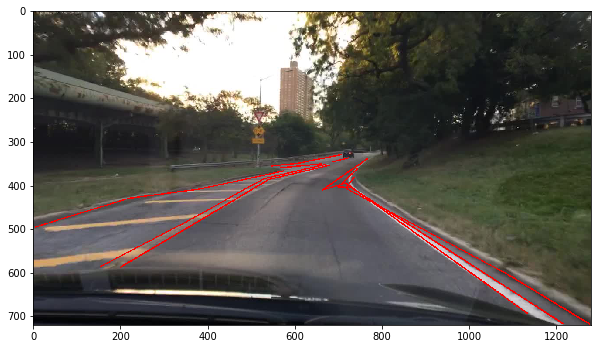

In [9]:
fig = plt.figure(figsize=(10,10))
plt.plot()
plt.imshow(img_lane)

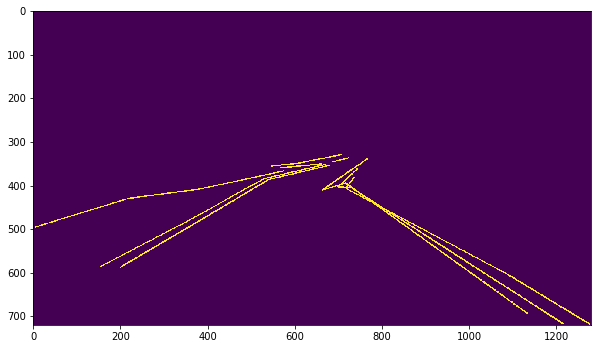

In [10]:
fig = plt.figure(figsize=(10,10))
plt.plot()
plt.imshow(dst_binary_image)